# Team 6 Project: MINJUSTICIA

In [6]:
import pandas as pd
import numpy as np
import calendar
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 7
import requests
import io
from datetime import datetime
import geopandas
import branca
import folium # package for making maps, please make sure to use a version older than 1.0.0.
from folium.plugins import TimeSliderChoropleth

Data

In [2]:
url="https://raw.githubusercontent.com/sagilar/ds4a-team6/master/retomintic/Data_UpdateJune13/reincidencia11junio2020_clean.csv"
df_mj = pd.read_csv(url,sep=",",encoding="utf-8")
df_mj

,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,ACTIVIDADES_ENSEÑANZA,NIVEL_EDUCATIVO,HIJOS_MENORES,CONDIC_EXPECIONAL,CODIGO_ESTABLECIMIENTO,ESTABLECIMIENTO,DEPTO_ESTABLECIMIENTO,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO
0,5496C737C624136DB406CFC6744C684C070A3CD8,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,01/01/10,12/05/11,30/12/09,...,NO,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja
1,1097561F306939C26DB4AC60377063DA7E2B079F,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,CONTRA LA SALUD PUBLICA,DE LAS AFECTACIONES A LA SALUD PUBLICA,N,N,N,01/01/10,05/12/11,30/12/09,...,NO,CICLO I,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja
2,CB7033A707ADE673139F8A17CAD26AD54696C135,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,01/01/10,06/08/13,30/12/09,...,NO,CICLO I,SI,NaN,235,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142896,856368363834654A5F64534163FE7C7EE6A8A1CA,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,11/06/20,NaN,13/08/16,...,NO,CICLO I,NO,CON DISCAPACIDAD,613,EPMSC ARMENIA,QUINDIO,ARMENIA,VIEJO CALDAS,Activo
142897,E5385D722533896751FBF38A2129D97966267AB1,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,S,N,N,11/06/20,NaN,09/06/20,...,NO,CICLO I,SI,AFRO COLOMBIANO,5373,COMPLEJO CARCELARIO Y PENITENCIARIO DE MEDELLI...,ANTIOQUIA,MEDELLIN,NOROESTE,Activo
142898,FA176CD9955DAF77F313343E29136E87FE8B0056,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,11/06/20,NaN,02/08/18,...,NO,CICLO IV,SI,NaN,204,EPMSC EL BORDO,CAUCA,EL BORDO,OCCIDENTE,Activo


In [3]:
df_mj.columns

Index(['INTERNOEN', 'DELITO', 'TITULO_DELITO', 'SUBTITULO_DELITO', 'TENTATIVA',
       'AGRAVADO', 'CALIFICADO', 'FECHA_INGRESO', 'FECHA_SALIDA',
       'FECHA_CAPTURA', 'SITUACION_JURIDICA', 'ANO_NACIMIENTO', 'EDAD',
       'GENERO', 'ESTADO_CIVIL', 'PAIS_INTERNO', 'DEPARTAMENTO', 'CIUDAD',
       'REINCIDENTE', 'ESTADO_INGRESO', 'ACTIVIDADES_TRABAJO',
       'ACTIVIDADES_ESTUDIO', 'ACTIVIDADES_ENSEÑANZA', 'NIVEL_EDUCATIVO',
       'HIJOS_MENORES', 'CONDIC_EXPECIONAL', 'CODIGO_ESTABLECIMIENTO',
       'ESTABLECIMIENTO', 'DEPTO_ESTABLECIMIENTO', 'MPIO_ESTABLECIMIENTO',
       'REGIONAL', 'ESTADO'],
      dtype='object')

In [4]:
df_mj["FECHA_CAPTURA"] = pd.to_datetime(df_mj["FECHA_CAPTURA"])
df_mj["FECHA_INGRESO"] = pd.to_datetime(df_mj["FECHA_INGRESO"])
df_mj["FECHA_CAPTURA"] = pd.to_datetime(df_mj["FECHA_CAPTURA"])

df_mj["MES_INGRESO_INT"]=df_mj["FECHA_INGRESO"].dt.strftime('%m')
df_mj

,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,NIVEL_EDUCATIVO,HIJOS_MENORES,CONDIC_EXPECIONAL,CODIGO_ESTABLECIMIENTO,ESTABLECIMIENTO,DEPTO_ESTABLECIMIENTO,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO,MES_INGRESO_INT
0,5496C737C624136DB406CFC6744C684C070A3CD8,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2010-01-01,12/05/11,2009-12-30,...,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja,01
1,1097561F306939C26DB4AC60377063DA7E2B079F,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,CONTRA LA SALUD PUBLICA,DE LAS AFECTACIONES A LA SALUD PUBLICA,N,N,N,2010-01-01,05/12/11,2009-12-30,...,CICLO I,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja,01
2,CB7033A707ADE673139F8A17CAD26AD54696C135,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2010-01-01,06/08/13,2009-12-30,...,CICLO I,SI,NaN,235,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Baja,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142896,856368363834654A5F64534163FE7C7EE6A8A1CA,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-11-06,NaN,2016-08-13,...,CICLO I,NO,CON DISCAPACIDAD,613,EPMSC ARMENIA,QUINDIO,ARMENIA,VIEJO CALDAS,Activo,11
142897,E5385D722533896751FBF38A2129D97966267AB1,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,S,N,N,2020-11-06,NaN,2020-09-06,...,CICLO I,SI,AFRO COLOMBIANO,5373,COMPLEJO CARCELARIO Y PENITENCIARIO DE MEDELLI...,ANTIOQUIA,MEDELLIN,NOROESTE,Activo,11
142898,FA176CD9955DAF77F313343E29136E87FE8B0056,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-11-06,NaN,2018-02-08,...,CICLO IV,SI,NaN,204,EPMSC EL BORDO,CAUCA,EL BORDO,OCCIDENTE,Activo,11


In [7]:
for column in ['FECHA_INGRESO', 'FECHA_SALIDA', 'FECHA_CAPTURA']:
    df_mj = df_mj.sort_values(['INTERNOEN', column], ascending = False)
    
    df_mj['DIAS' + column[5:]] = -1*df_mj[column].diff().copy()

    df_mj.loc[(df_mj.INTERNOEN != df_mj.INTERNOEN.shift(1)) | (df_mj['DIAS' + column[5:]] == np.timedelta64(0)), 
              ['DIAS' + column[5:]]] = datetime.today() - df_mj[column]
    
df_mj['DIAS_CONDENA'] = df_mj['FECHA_SALIDA'] - df_mj['FECHA_INGRESO'] 
df_mj['DIAS_JUDICIALIZACION'] = df_mj['FECHA_INGRESO'] - df_mj['FECHA_CAPTURA']
df_mj['DIAS_LIBRE'] = df_mj['DIAS_INGRESO'] - df_mj['DIAS_CONDENA']

TypeError: unsupported operand type(s) for -: 'str' and 'float'

individuals

In [8]:
individuals = df_mj["INTERNOEN"].unique()
print("length of complete df: " + str(df_mj["INTERNOEN"].count()))
print("length of unique individuals: "+ str(len(individuals)))


length of complete df: 142899
length of unique individuals: 78841


In [9]:
print("number of occurrences by individual")
occurrences = df_mj["INTERNOEN"].value_counts()
occurrences

number of occurrences by individual


71D8863489582B956956B3E244CF97F629E190F8    16
85F84CC906246E467ACC8D3CD73B576E0B264556    15
C6A8D6B8A3433007BDDE0B6A682268EFD0FA16AD    14
                                            ..
5CD486BF94E1F7EBC5E2DFA2FE6898887459A686     1
2FFBBE66DC1471CBBF79D096869AB123CC59C49B     1
D8C35136560C99C75532C11797DA54E894237FC9     1
Name: INTERNOEN, Length: 78841, dtype: int64

In [10]:
for item in occurrences.index:
    print("crimes of individual " + str(item) + ": ")
    crime_list_per_ind = df_mj["DELITO"].where(df_mj["INTERNOEN"]==item)
    for crime in crime_list_per_ind.dropna():
        print(crime + ", ", end="")
    #breaking to check just first ind
    break

crimes of individual 71D8863489582B956956B3E244CF97F629E190F8: 
CONCIERTO PARA DELINQUIR, CONCIERTO PARA DELINQUIR, CONSTREÑIMIENTO ILEGAL, DESPLAZAMIENTO FORZADO, DESPLAZAMIENTO FORZADO, DESTRUCCION Y APROPIACION DE BIENES PROTEGIDOS, FABRICACION  TRAFICO Y PORTE DE ARMAS Y MUNICIONES DE USO PRIVATIVO DE LAS FUERZAS ARMADAS, HOMICIDIO, HOMICIDIO, HOMICIDIO EN PERSONA PROTEGIDA, HURTO, HURTO, RECLUTAMIENTO ILICITO, SECUESTRO SIMPLE, TORTURA EN PERSONA PROTEGIDA, UTILIZACION ILEGAL DE UNIFORMES E INSIGNIAS, 

Ubicación geográfica

In [11]:
dept_count = df_mj["DEPTO_ESTABLECIMIENTO"].value_counts()
dept_count

BOGOTA D.C.                 19008
ANTIOQUIA                   18591
VALLE DEL CAUCA             17346
                            ...  
PUTUMAYO                      378
AMAZONAS                      349
SAN ANDRES Y PROVIDENCIA      252
Name: DEPTO_ESTABLECIMIENTO, Length: 29, dtype: int64

### Gender Information

['INTERNOEN', 'DELITO', 'TITULO_DELITO', 'SUBTITULO_DELITO', 'TENTATIVA',
       'AGRAVADO', 'CALIFICADO', 'FECHA_INGRESO', 'FECHA_SALIDA',
       'FECHA_CAPTURA', 'SITUACION_JURIDICA', 'ANO_NACIMIENTO', 'EDAD',
       'GENERO', 'ESTADO_CIVIL', 'PAIS_INTERNO', 'DEPARTAMENTO', 'CIUDAD',
       'REINCIDENTE', 'ESTADO_INGRESO', 'ACTIVIDADES_TRABAJO',
       'ACTIVIDADES_ESTUDIO', 'ACTIVIDADES_ENSEÑANZA', 'NIVEL_EDUCATIVO',
       'HIJOS_MENORES', 'CONDIC_EXPECIONAL', 'CODIGO_ESTABLECIMIENTO',
       'ESTABLECIMIENTO', 'DEPTO_ESTABLECIMIENTO', 'MPIO_ESTABLECIMIENTO',
       'REGIONAL', 'ESTADO']

UNION LIBRE       37926
SOLTERO(A)        20988
CASADO(A)          2834
                  ...  
DIVORCIADO(A)        42
PENDIENTE POR        25
RELIGIOSO(A)          1
Name: ESTADO_CIVIL, Length: 8, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

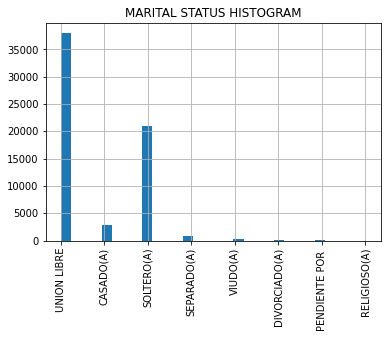

In [36]:
print(df_mj['ESTADO_CIVIL'].value_counts())
df_mj['ESTADO_CIVIL'].hist(bins=30)
plt.title("MARITAL STATUS HISTOGRAM")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'MINOR CHILDREN HISTOGRAM')

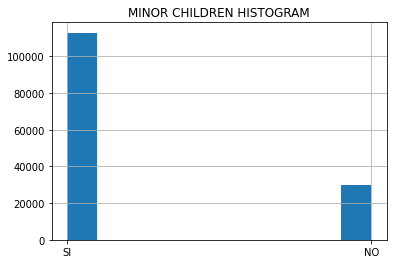

In [38]:
df_mj["HIJOS_MENORES"].hist()
plt.title("MINOR CHILDREN HISTOGRAM")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

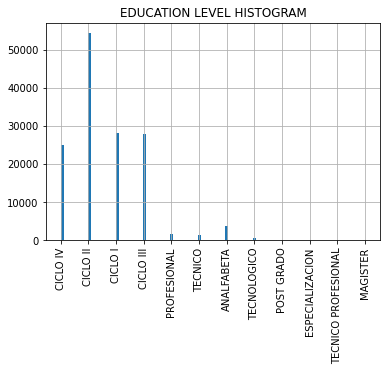

In [41]:
df_mj["NIVEL_EDUCATIVO"].hist(bins=100)
plt.title("EDUCATION LEVEL HISTOGRAM")
plt.xticks(rotation=90)

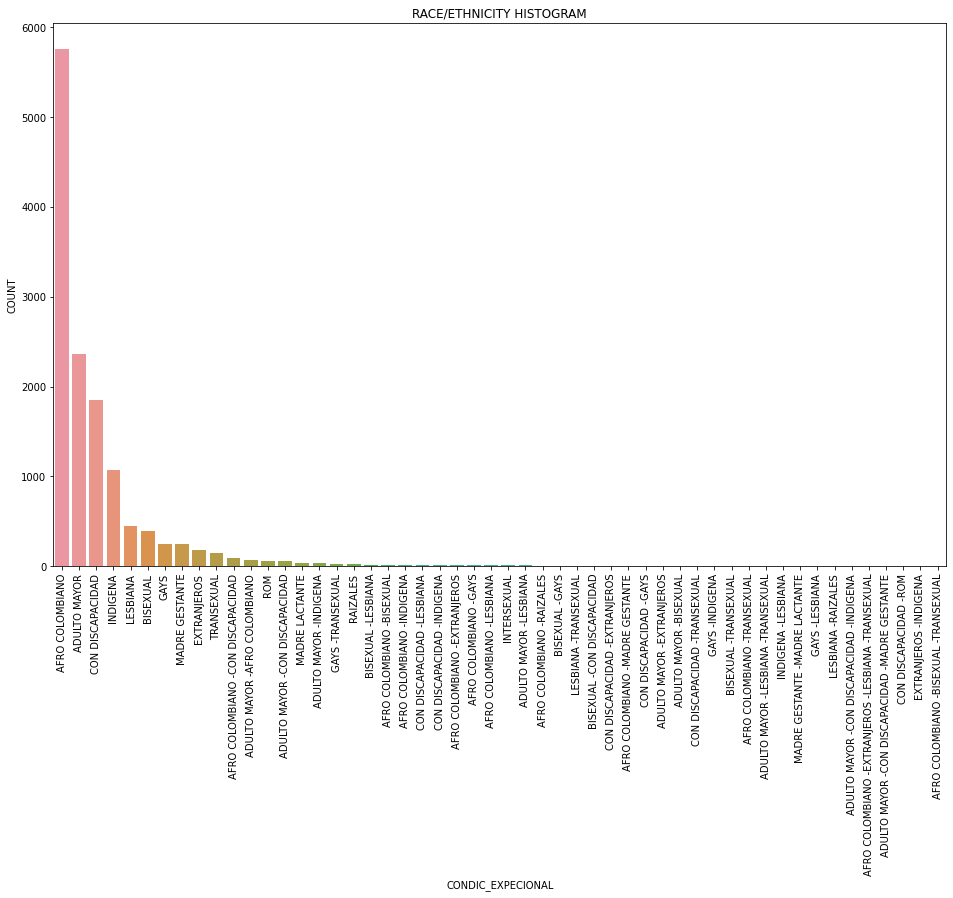

In [55]:
df_mj_etn=df_mj["CONDIC_EXPECIONAL"].value_counts().reset_index()
df_mj_etn.columns=["CONDIC_EXPECIONAL","COUNT"]
fig = plt.figure(figsize=(16,10))
#df_mj["CONDIC_EXPECIONAL"].hist(bins=100)
plt.title("RACE/ETHNICITY HISTOGRAM")
A=plt.xticks(rotation=90)
etn_bc = sns.barplot(x="CONDIC_EXPECIONAL", y="COUNT",data=df_mj_etn)


In [14]:
df_mj['GENERO'].value_counts()

MASCULINO    131485
FEMENINO      11414
Name: GENERO, dtype: int64

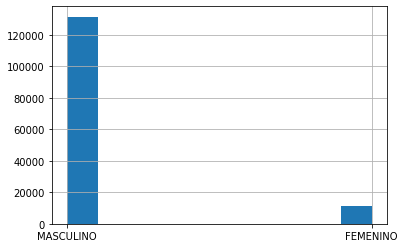

In [16]:
df_mj["GENERO"].hist()

35    6395
30    6387
29    6308
      ... 
93       3
90       2
91       2
Name: EDAD, Length: 75, dtype: int64


Text(0.5, 1.0, 'AGE HISTOGRAM OF MALE RECIDIVISTS')

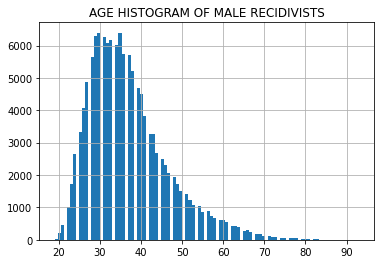

In [30]:
df_mj_men = df_mj[df_mj["GENERO"]=="MASCULINO"]
print(df_mj_men["EDAD"].value_counts())
df_mj_men["EDAD"].hist(bins=100)
plt.title("AGE HISTOGRAM OF MALE RECIDIVISTS")

38    497
35    486
36    480
     ... 
92      1
85      1
94      1
Name: EDAD, Length: 70, dtype: int64


Text(0.5, 1.0, 'AGE HISTOGRAM OF FEMALE RECIDIVISTS')

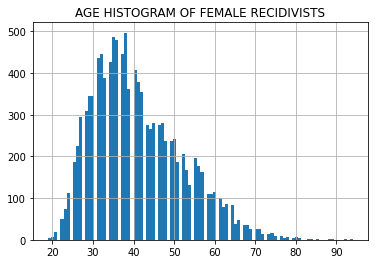

In [31]:
df_mj_women = df_mj[df_mj["GENERO"]=="FEMENINO"]
print(df_mj_women["EDAD"].value_counts())
df_mj_women["EDAD"].hist(bins=100)
plt.title("AGE HISTOGRAM OF FEMALE RECIDIVISTS")

In [58]:
df_demo = df_mj[["GENERO","EDAD","NIVEL_EDUCATIVO","HIJOS_MENORES","ESTADO_CIVIL","CONDIC_EXPECIONAL"]]
df_demo.head()

,GENERO,EDAD,NIVEL_EDUCATIVO,HIJOS_MENORES,ESTADO_CIVIL,CONDIC_EXPECIONAL
72750,MASCULINO,29,CICLO IV,SI,UNION LIBRE,NaN
72751,MASCULINO,29,CICLO IV,SI,UNION LIBRE,NaN
72752,MASCULINO,29,CICLO IV,SI,UNION LIBRE,NaN
75131,MASCULINO,33,CICLO IV,SI,NaN,NaN
138808,MASCULINO,36,CICLO II,SI,UNION LIBRE,NaN


In [66]:
df_demo_grp = df_demo.groupby(by=["GENERO","NIVEL_EDUCATIVO","CONDIC_EXPECIONAL","ESTADO_CIVIL"]).agg({'STATS':['count','mean']})
df_demo_grp.reset_index(inplace=True)
df_demo_grp

KeyError: "Column 'STATS' does not exist!"